# PML HW3 Submission Notebook

Name - Atreya Goswami<br/>
Roll No. - 190201<br/>
Date of submission - May 04, 2023<br/>

Q$5. (b)$ part

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mulnorm
from tqdm.notebook import tqdm_notebook

np.random.seed(42)

In [2]:
def p():
    return mulnorm(np.array([4,4]), np.array([[1,0.8], [0.8,1]]))

def q(z, sigma):
    return mulnorm(z, np.array([[sigma**2,0], [0,sigma**2]]))

sigma_val = [0.1,1,10]

In [3]:
def compute_sample_mean_cov(samples):
    sample_mean = samples.mean(axis=0)
    sample_cov = 1/(samples.shape[0]-1)*(samples - sample_mean).T@(samples - sample_mean)
    return sample_mean, sample_cov

def plot_samples(samples, sigma):
    samples = np.array(samples)
    sample_mean, sample_cov = compute_sample_mean_cov(samples)
    plt.figure(figsize=(10,10))
    x, y = np.mgrid[-2:8:.01, -2:8:.01]
    pos = np.dstack((x, y))
    plt.scatter(samples[:, 0], samples[:, 1], s=1, c='r', label="Samples")
    rv = mulnorm([4, 4], [[1, 0.8], [0.8, 1]])
    c1 = plt.contour(x, y, rv.pdf(pos), levels=[0.03], colors="blue")
    c2 = plt.contour(x, y, mulnorm(sample_mean, sample_cov).pdf(pos), levels=[0.03], colors="green")
    h1,l1 = c1.legend_elements()
    h2,l1 = c2.legend_elements()
    first_legend=plt.legend([h1[0], h2[0]], [r"$p(z)$", r"$\tilde{p}(z)$"])
    plt.title(f"Approximation with $\sigma^2$ = {np.round(100*sigma**2)/100} and {len(samples)} samples")
    plt.savefig(f"sigma={np.round(100*sigma)/100}andN={len(samples)}.png")
    plt.show()

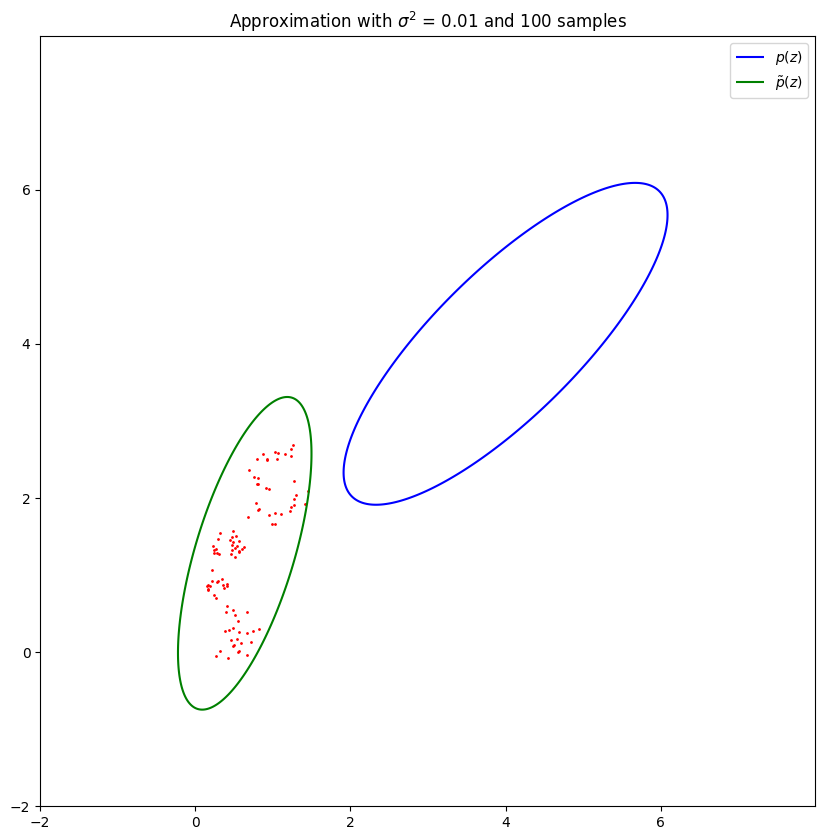

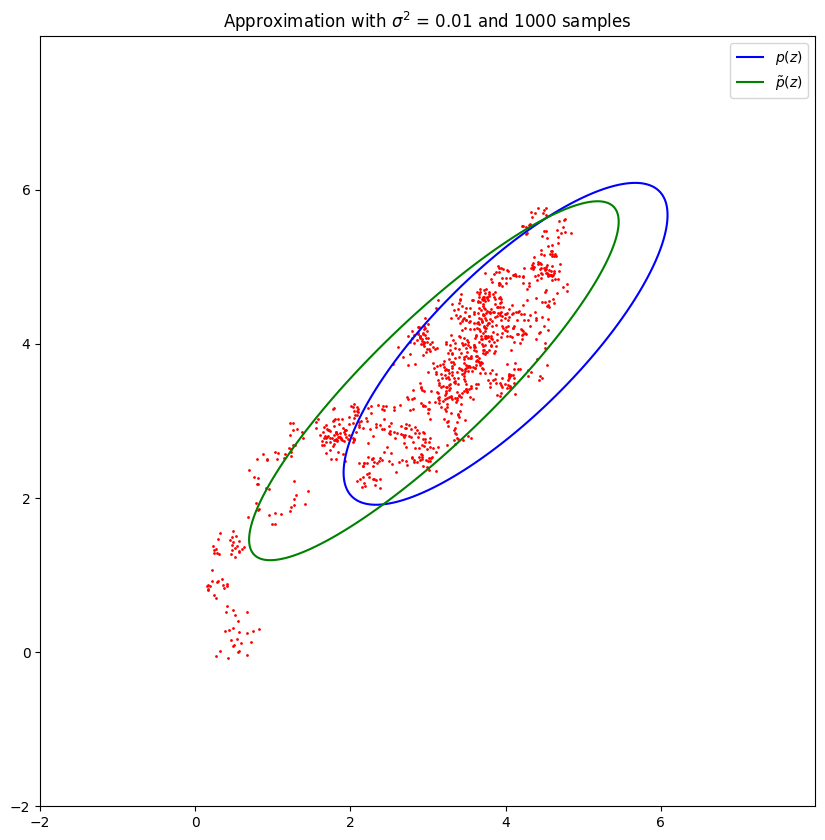

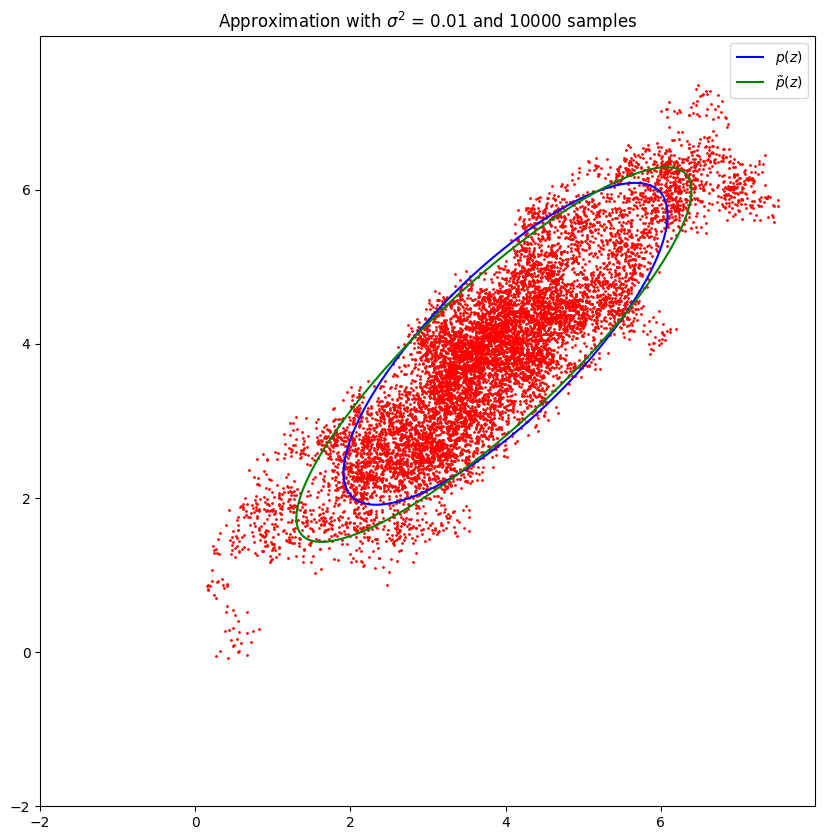

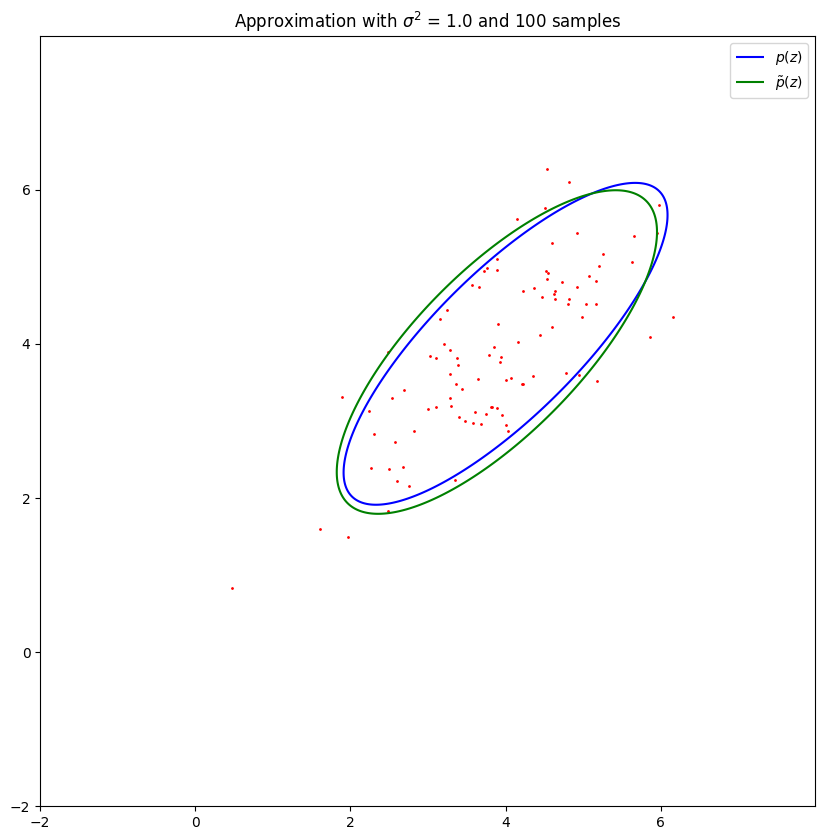

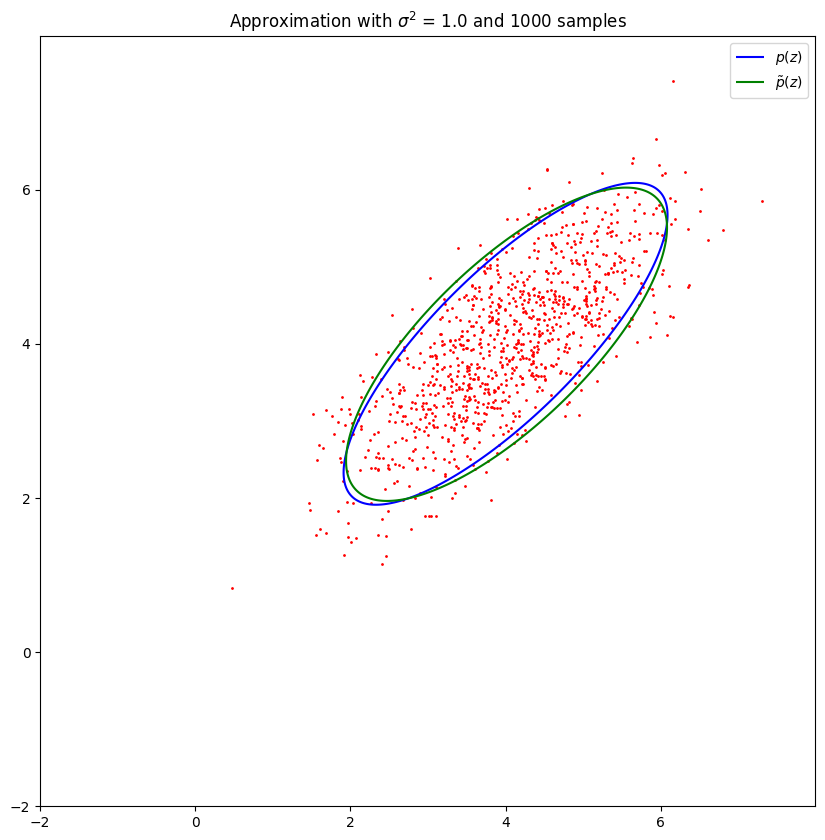

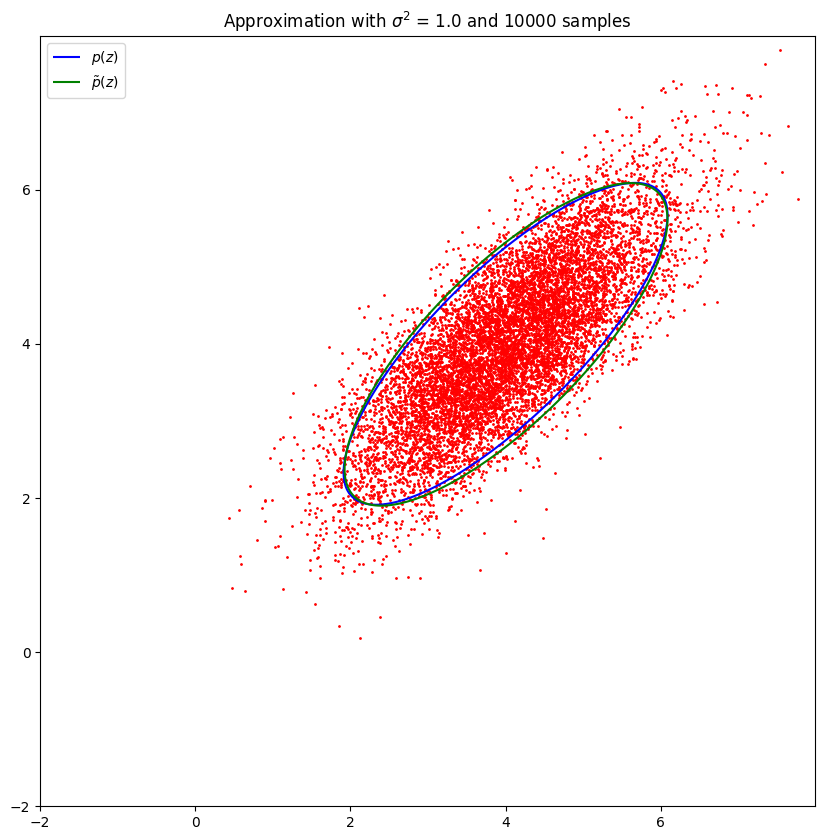

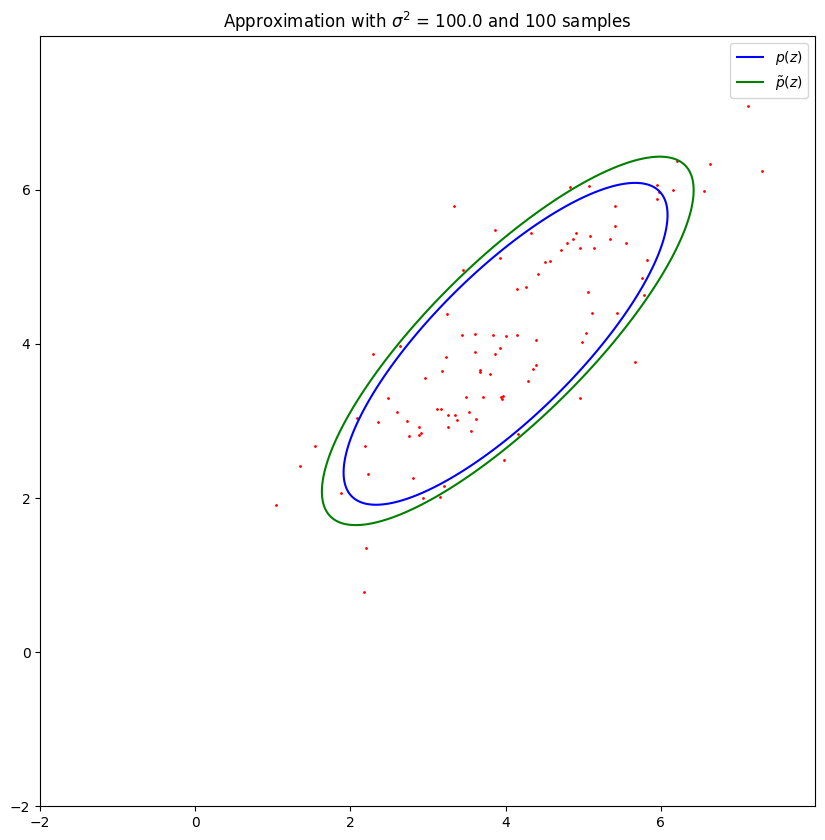

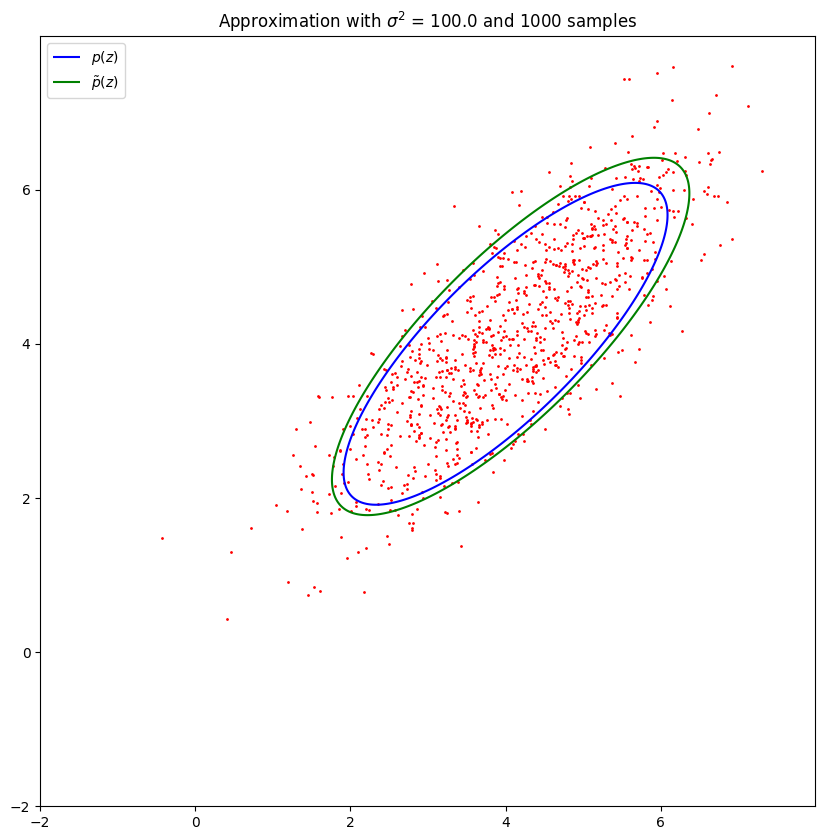

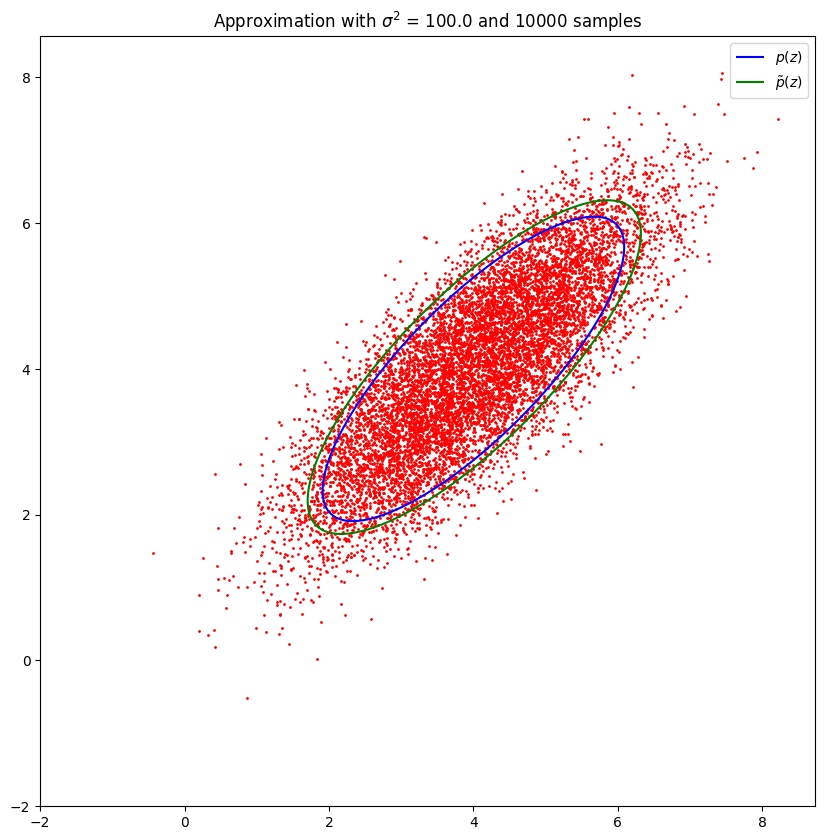

In [4]:
num_samples = 10000
rej_rates = []

for sigma in sigma_val:
    samples = []
    acceptance, rejection = 0, 0
    p_dist = p()
    samples.append(np.random.randn(2))
    
    while acceptance < num_samples:
        new_sample = q(samples[-1], sigma).rvs()
        unif = np.random.uniform(0,1)
        
        A = p_dist.pdf(new_sample) / p_dist.pdf(samples[-1])
        A *= q(new_sample, sigma).pdf(samples[-1]) / q(samples[-1], sigma).pdf(new_sample)
        A = min(1, A)
   
        if unif < A :
            samples.append(new_sample)
            acceptance += 1
        else :
            # samples[i] = samples[i-1]
            rejection += 1
    
    rej_rates.append(rejection/(acceptance + rejection))
    plot_samples(samples[1:101], sigma)
    plot_samples(samples[1:1001], sigma)
    plot_samples(samples[1:], sigma)

In [5]:
for i in range(len(rej_rates)):
    print(f"Rejection rate for sigma^2 = {np.round(100*sigma_val[i]**2)/100} is : " + str(np.round(10000*rej_rates[i])/100) + " %")

Rejection rate for sigma^2 = 0.01 is : 8.16 %
Rejection rate for sigma^2 = 1.0 is : 59.76 %
Rejection rate for sigma^2 = 100.0 is : 98.84 %


The proposal with $\sigma^2 = 1.0$ seems to be the best choice, as the samples fit the true distribution well, along with having less rejection rate $59.76\%$.